In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
from collections import defaultdict
from collections import Counter 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from matplotlib import cm
cmap = cm.get_cmap('jet')

In [10]:
takehome_user_engagement  = pd.read_csv('D:\\HATHWAY ISP\\DSC\\Unit17\\relax_challenge\\takehome_user_engagement.csv')
takehome_users = pd.read_csv('D:\\HATHWAY ISP\\DSC\\Unit17\\relax_challenge\\takehome_users.csv', encoding='latin-1')

In [13]:
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [14]:
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [66]:
visisted_users = (
    takehome_user_engagement
    .set_index(['time_stamp'])
    .drop_duplicates()
    .groupby('user_id')
    .count()
    .sort_values(by='visited', ascending=False)
    .reset_index() 
    .rename(columns={"user_id": "object_id"})
)

In [115]:
takehome_user_engagement[takehome_user_engagement['user_id'] ==2].sort_values(by='time_stamp', ascending=False)

,time_stamp,user_id,visited
14,2014-03-31 03:45:04,2,1
13,2014-03-13 03:45:04,2,1
12,2014-03-09 03:45:04,2,1
11,2014-02-16 03:45:04,2,1
10,2014-02-13 03:45:04,2,1
9,2014-02-09 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [71]:
visisted_users_details = pd.merge(takehome_users, visisted_users, how='left', on='object_id')

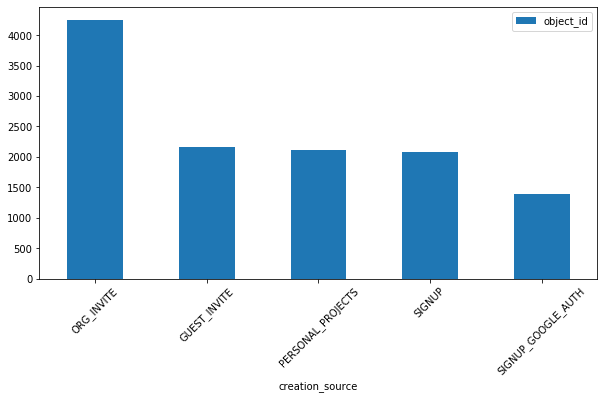

In [97]:
(
    visisted_users_details
    .filter(['object_id', 'creation_source'])
    .groupby('creation_source')
    .count()
    .sort_values(by="object_id", ascending=False)
    .plot(kind='bar', figsize=(10,5), rot=45)
)

. From the above Plot we can conlude that Number of Users invited to an organization 

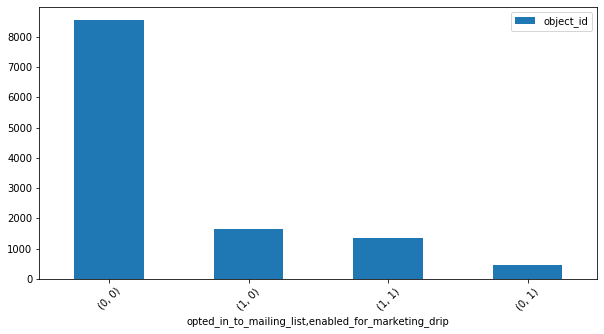

In [109]:
(
    visisted_users_details
    .filter(['object_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip'])
    .fillna('x')
    .groupby(['opted_in_to_mailing_list', 'enabled_for_marketing_drip'])
    .count()
    .sort_values(by="object_id", ascending=False)
    .plot(kind='bar', figsize=(10,5), rot=45)
)